In [1]:
import pandas as pd

In [2]:
DATASET_PATH = "../../../Dataset/Collected Dataset/"

# flow data
flow_files = {
    "attack": [
        "icmp_ddos_flood.csv",
        "land_attack.csv",
        "malformed_packets.csv",
        "nestea_attack.csv",
        "nmap_probe_attack.csv",
        "ping_of_death_attack.csv",
        "tcp_ddos_flood.csv",
        "udp_ddos_flood.csv"
    ],
    "normal": [
        "normal_iperf.csv",
        "normal_w3m.csv"
    ]
}

In [3]:
dfs = []

for attack_type, files in flow_files.items():
    for file in files:
        try:
            data = pd.read_csv(DATASET_PATH + file)
            data["type"] = attack_type
            dfs.append(data)
        except FileNotFoundError:
            print(f"Error: File '{file}' not found. Skipping...")

In [4]:
combined = pd.concat(dfs, ignore_index=True)

In [5]:
combined

,src,dst,table_id,ip_bytes,ip_packet,ip_duration,in_port,port_bytes,port_packet,port_flow_count,...,port_rx_dropped,port_tx_dropped,port_rx_errors,port_tx_errors,port_rx_frame_err,port_rx_over_err,port_rx_crc_err,port_collisions,port_duration_sec,type
0,NaN,NaN,0,0,0,0,3,27874,90,3,...,0,0,0,0,0,0,0,0,23,attack
1,NaN,NaN,0,9594,9,0,1,28160,93,3,...,0,0,0,0,0,0,0,0,23,attack
2,NaN,NaN,0,0,0,0,1,71780,133,3,...,0,0,0,0,0,0,0,0,23,attack
3,NaN,NaN,0,18122,17,0,3,71580,131,3,...,0,0,0,0,0,0,0,0,23,attack
4,NaN,NaN,0,0,0,1,3,1231388,1219,3,...,0,0,0,0,0,0,0,0,24,attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50568,NaN,NaN,0,39935829,12745,1219,4,108454296,112143,7,...,0,0,0,0,0,0,0,0,1246,normal
50569,NaN,NaN,0,44205485,12669,1202,4,108454296,112143,7,...,0,0,0,0,0,0,0,0,1246,normal
50570,NaN,NaN,0,971736,11025,1153,2,45197109,23874,7,...,0,0,0,0,0,0,0,0,1277,normal
50571,NaN,NaN,0,944474,10671,1129,1,40900455,23599,7,...,0,0,0,0,0,0,0,0,1277,normal


In [6]:
# Extracting relevant features
combined['ip_bytes_sec'] = combined['ip_bytes'] / combined['ip_duration']
combined['ip_packets_sec'] = combined['ip_packet'] / combined['ip_duration']
combined['ip_bytes_packet'] = combined['ip_bytes'] / combined['ip_packet']
combined['port_bytes_sec'] = combined['port_bytes'] / combined['ip_duration']
combined['port_packet_sec'] = combined['port_packet'] / combined['ip_duration']
combined['port_byte_packet'] = combined['port_bytes'] / combined['port_packet']
combined['port_flow_count_sec'] = combined['port_flow_count'] / combined['ip_duration']
combined['table_matched_lookup'] = combined['table_matched_count'] / combined['table_lookup_count']
combined['table_active_lookup'] = combined['table_active_count'] / combined['table_lookup_count']
combined['port_rx_packets_sec'] = combined['port_rx_packets'] / combined['port_duration_sec']
combined['port_tx_packets_sec'] = combined['port_tx_packets'] / combined['port_duration_sec']
combined['port_rx_bytes_sec'] = combined['port_rx_bytes'] / combined['port_duration_sec']
combined['port_tx_bytes_sec'] = combined['port_tx_bytes'] / combined['port_duration_sec']

In [27]:
# Removing identifying features
features = combined[
    [
        'ip_bytes_sec',
        'ip_packets_sec',
        'ip_bytes_packet',
        'port_bytes_sec',
        'port_packet_sec',
        'port_byte_packet',
        'port_flow_count_sec',
        'table_matched_lookup',
        'table_active_lookup',
        'port_rx_packets_sec',
        'port_tx_packets_sec',
        'port_rx_bytes_sec',
        'port_tx_bytes_sec',
        'type'
    ]
].copy()
features.describe()

,ip_bytes_sec,ip_packets_sec,ip_bytes_packet,port_bytes_sec,port_packet_sec,port_byte_packet,port_flow_count_sec,table_matched_lookup,table_active_lookup,port_rx_packets_sec,port_tx_packets_sec,port_rx_bytes_sec,port_tx_bytes_sec
count,5.053000e+04,5.053000e+04,49849.000000,5.057300e+04,5.057300e+04,50573.000000,5.057300e+04,50573.000000,50573.000000,50573.000000,50573.000000,5.057300e+04,5.057300e+04
mean,inf,inf,494.915613,inf,inf,539.605586,inf,0.999999,0.000615,334.377167,334.484294,1.095320e+05,1.067289e+05
std,NaN,NaN,944.887709,NaN,NaN,668.153399,NaN,0.000079,0.003125,628.565251,630.734287,2.295222e+05,2.314072e+05
min,0.000000e+00,0.000000e+00,42.000000,1.814542e+01,2.145422e-01,42.003799,2.153625e-03,0.987500,0.000003,0.047170,0.059514,2.842767e+00,6.446359e+00
25%,6.125000e+00,1.150877e-01,42.000000,1.402297e+04,1.016242e+02,46.575499,1.624130e-02,1.000000,0.000012,0.480519,0.967742,3.607407e+01,9.316327e+01
50%,9.973598e+02,1.187286e+01,54.000000,9.327414e+04,5.600522e+02,55.617732,2.508961e-02,1.000000,0.000043,37.783163,34.684932,2.146387e+03,6.597053e+03
75%,6.754816e+04,3.140652e+02,154.194175,4.107108e+05,1.437216e+03,1065.198882,4.895105e-02,1.000000,0.000284,294.468368,287.739033,1.045497e+05,1.000966e+05
max,inf,inf,6221.172685,inf,inf,3174.864845,inf,1.000000,0.093333,3050.359127,3049.918651,1.135476e+06,1.135706e+06


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
attack = features.loc[features['type'] == 'attack']
normal = features.loc[features['type'] == 'normal']

<Axes: ylabel='port_bytes_sec'>

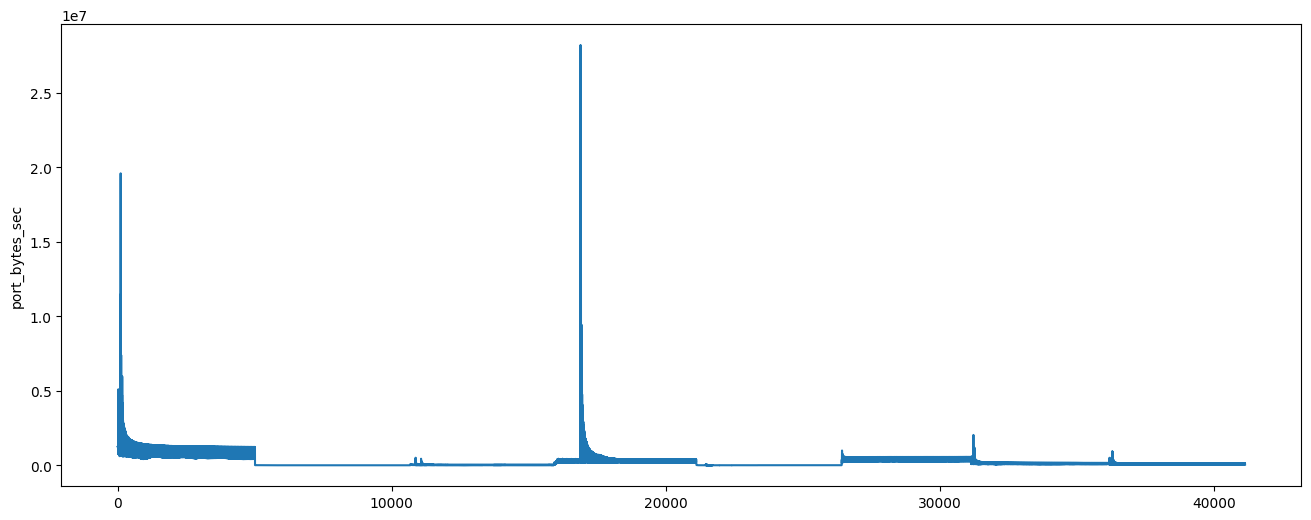

In [21]:
plt.figure(figsize=(16,6))
sns.lineplot(data=attack['port_bytes_sec'])

<Axes: ylabel='port_bytes_sec'>

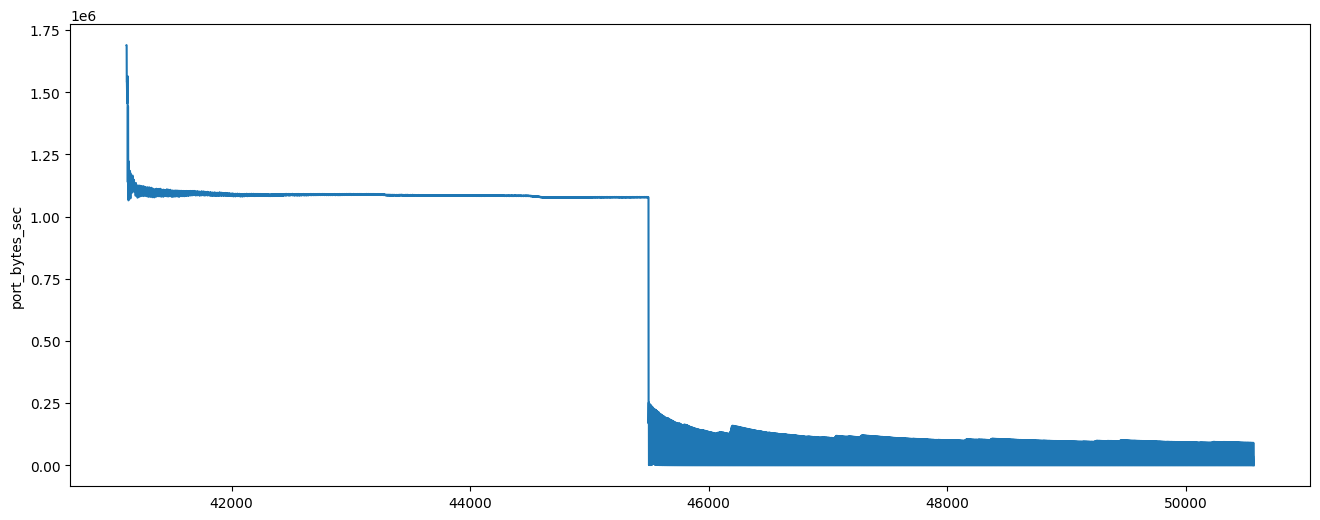

In [22]:
plt.figure(figsize=(16,6))
sns.lineplot(data=normal['port_bytes_sec'])

In [23]:
attack_df = attack
normal_df = normal# Total attack and normal data
features['type'].value_counts()

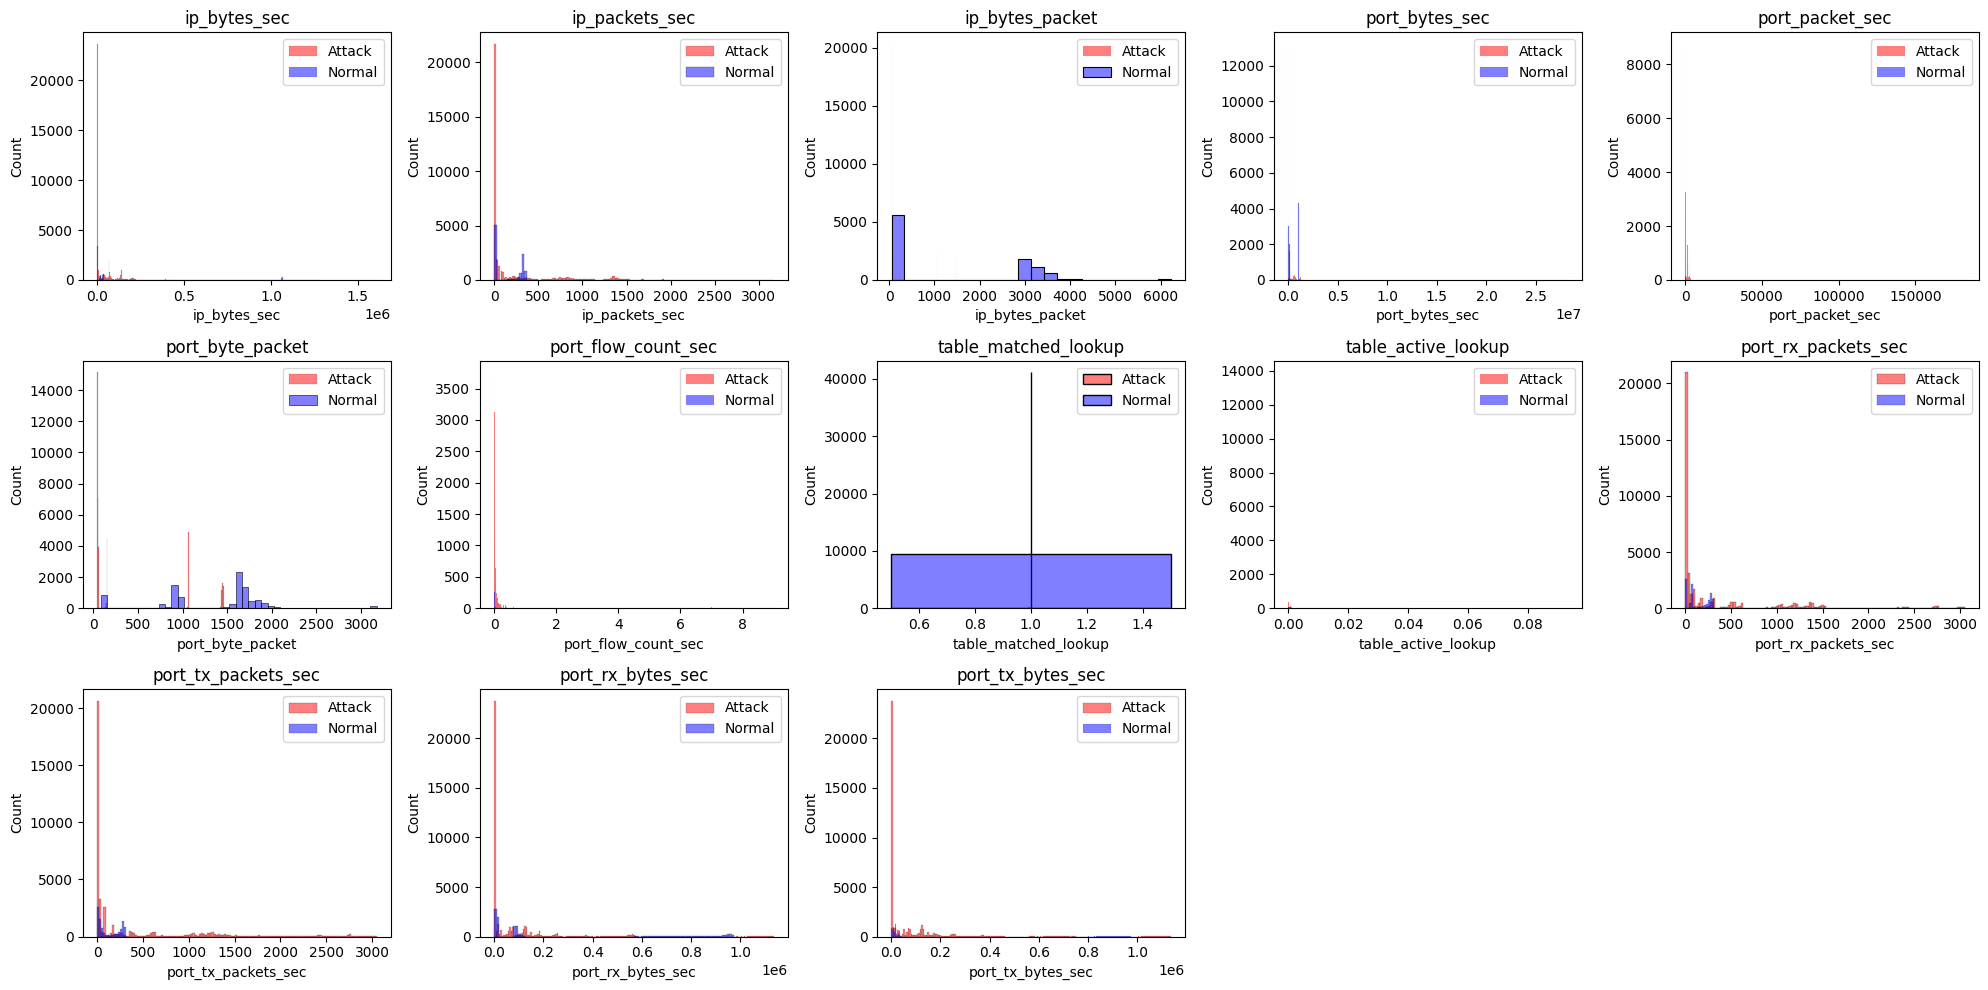

In [37]:
features_list = ['ip_bytes_sec', 'ip_packets_sec', 'ip_bytes_packet',
            'port_bytes_sec', 'port_packet_sec', 'port_byte_packet',
            'port_flow_count_sec', 'table_matched_lookup',
            'table_active_lookup', 'port_rx_packets_sec',
            'port_tx_packets_sec', 'port_rx_bytes_sec',
            'port_tx_bytes_sec']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(features_list, start=1):
    plt.subplot(3, 5, i)
    sns.histplot(attack_df[feature], color='red', alpha=0.5, label='Attack')
    sns.histplot(normal_df[feature], color='blue', alpha=0.5, label='Normal')
    plt.title(feature)
    plt.legend()

plt.tight_layout()
plt.show()

In [29]:
import numpy as np
# Removing inf and NaN values
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)
features.describe()

,ip_bytes_sec,ip_packets_sec,ip_bytes_packet,port_bytes_sec,port_packet_sec,port_byte_packet,port_flow_count_sec,table_matched_lookup,table_active_lookup,port_rx_packets_sec,port_tx_packets_sec,port_rx_bytes_sec,port_tx_bytes_sec
count,4.980000e+04,49800.000000,49800.000000,4.980000e+04,49800.000000,49800.000000,49800.000000,49800.000000,49800.000000,49800.000000,49800.000000,4.980000e+04,4.980000e+04
mean,9.367181e+04,236.131310,494.886636,2.819283e+05,907.439541,542.432774,0.066142,1.000000,0.000566,339.410090,335.604130,1.111855e+05,1.067977e+05
std,2.351507e+05,415.716971,945.110971,4.512961e+05,1786.114418,670.550416,0.254826,0.000003,0.002720,632.046705,634.771152,2.308873e+05,2.324713e+05
min,2.359551e-01,0.005618,42.000000,1.814542e+01,0.214542,42.003799,0.002154,0.999696,0.000003,0.047170,0.059514,2.842767e+00,6.446359e+00
25%,6.786446e+00,0.143802,42.000000,1.399984e+04,101.198653,46.581597,0.016166,1.000000,0.000012,0.541667,0.904255,4.356643e+01,8.499010e+01
50%,1.096707e+03,12.144878,54.000000,9.285399e+04,548.652665,55.620882,0.024735,1.000000,0.000042,38.743503,33.900826,2.216779e+03,6.349408e+03
75%,6.782540e+04,314.449498,154.183838,4.101893e+05,1427.216086,1065.232359,0.046980,1.000000,0.000273,297.171163,286.930287,1.077352e+05,9.828474e+04
max,1.607856e+06,3167.000000,6221.172685,2.818552e+07,181944.000000,3174.864845,9.000000,1.000000,0.093333,3050.359127,3049.918651,1.135476e+06,1.135706e+06


In [31]:
# Total attack and normal data
features['type'].value_counts()

type
attack    40356
normal     9444
Name: count, dtype: int64

In [32]:
attack = features.loc[features['type'] == 'attack']
normal = features.loc[features['type'] == 'normal']

In [34]:
from sklearn.preprocessing import RobustScaler

attack = attack.drop('type', axis=1)
normal = normal.drop('type', axis=1)

attack_scaled = pd.DataFrame(RobustScaler().fit_transform(attack), columns=[
    'ip_bytes_sec',
    'ip_packets_sec',
    'ip_bytes_packet',
    'port_bytes_sec',
    'port_packet_sec',
    'port_byte_packet',
    'port_flow_count_sec',
    'table_matched_lookup',
    'table_active_lookup',
    'port_rx_packets_sec',
    'port_tx_packets_sec',
    'port_rx_bytes_sec',
    'port_tx_bytes_sec',
])

normal_scaled = pd.DataFrame(RobustScaler().fit_transform(normal), columns=[
    'ip_bytes_sec',
    'ip_packets_sec',
    'ip_bytes_packet',
    'port_bytes_sec',
    'port_packet_sec',
    'port_byte_packet',
    'port_flow_count_sec',
    'table_matched_lookup',
    'table_active_lookup',
    'port_rx_packets_sec',
    'port_tx_packets_sec',
    'port_rx_bytes_sec',
    'port_tx_bytes_sec',
])

In [35]:
attack_scaled.describe()

,ip_bytes_sec,ip_packets_sec,ip_bytes_packet,port_bytes_sec,port_packet_sec,port_byte_packet,port_flow_count_sec,table_matched_lookup,table_active_lookup,port_rx_packets_sec,port_tx_packets_sec,port_rx_bytes_sec,port_tx_bytes_sec
count,40356.000000,40356.000000,40356.000000,40356.000000,40356.000000,40356.000000,40356.000000,4.035600e+04,40356.000000,40356.000000,40356.000000,4.035600e+04,40356.000000
mean,0.802229,0.846752,15.123656,0.511079,0.311128,2.643794,1.366294,-1.828572e-07,2.267062,0.731797,0.898320,7.689120e-01,0.794519
std,1.753331,1.568747,31.263876,1.501717,1.310971,4.667578,7.910254,2.939068e-06,12.120927,1.401168,1.719628,1.682629e+00,1.778983
min,-0.010413,-0.042454,0.000000,-0.291310,-0.380367,-0.109253,-0.484138,-3.035823e-04,-0.142619,-0.054058,-0.053625,-1.409843e-02,-0.011736
25%,-0.010357,-0.042144,0.000000,-0.271603,-0.315950,-0.074929,-0.271336,0.000000e+00,-0.105659,-0.053368,-0.052386,-1.389494e-02,-0.011307
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.039521e-18,0.000000
75%,0.989643,0.957856,1.000000,0.728397,0.684050,0.925071,0.728664,0.000000e+00,0.894341,0.946632,0.947614,9.861051e-01,0.988693
max,18.769191,10.919178,91.461399,102.017623,121.653941,12.794896,254.905409,0.000000e+00,391.225562,6.130799,7.505252,1.036811e+01,10.892044


In [36]:
normal_scaled.describe()

,ip_bytes_sec,ip_packets_sec,ip_bytes_packet,port_bytes_sec,port_packet_sec,port_byte_packet,port_flow_count_sec,table_matched_lookup,table_active_lookup,port_rx_packets_sec,port_tx_packets_sec,port_rx_bytes_sec,port_tx_bytes_sec
count,9.444000e+03,9444.000000,9.444000e+03,9444.000000,9.444000e+03,9444.000000,9444.000000,9444.0,9444.000000,9.444000e+03,9444.000000,9.444000e+03,9.444000e+03
mean,6.546494e+00,0.444783,4.311200e-01,0.393998,2.794714e-01,-0.330749,1.103600,0.0,1.116797,2.442860e-01,0.273668,1.973611e+00,7.212249e+00
std,1.230924e+01,0.503271,5.334437e-01,0.489581,4.586420e-01,0.785493,8.131404,0.0,5.885394,4.510235e-01,0.469033,3.421471e+00,1.380832e+01
min,-5.743914e-01,-0.036043,-1.089548e-02,-0.123311,-2.429985e-01,-2.024595,-0.554626,0.0,-0.518843,-2.718338e-01,-0.224841,-1.874424e-01,-7.164151e-01
25%,-5.517035e-01,-0.006812,-6.948196e-03,-0.083208,-2.044169e-01,-0.908348,-0.331468,0.0,-0.505614,-2.385564e-01,-0.183338,-1.800968e-01,-3.720037e-01
50%,5.037813e-17,0.000000,-2.333576e-18,0.000000,-2.287667e-17,0.000000,0.000000,0.0,0.000000,2.751756e-17,0.000000,-1.783851e-17,7.060867e-17
75%,4.482965e-01,0.993188,9.930518e-01,0.916792,7.955831e-01,0.091652,0.668532,0.0,0.494386,7.614436e-01,0.816662,8.199032e-01,6.279963e-01
max,4.395610e+01,1.354277,2.014547e+00,1.495862,1.430502e+00,1.994655,303.957506,0.0,100.975442,9.398027e-01,0.996196,9.370967e+00,3.711290e+01


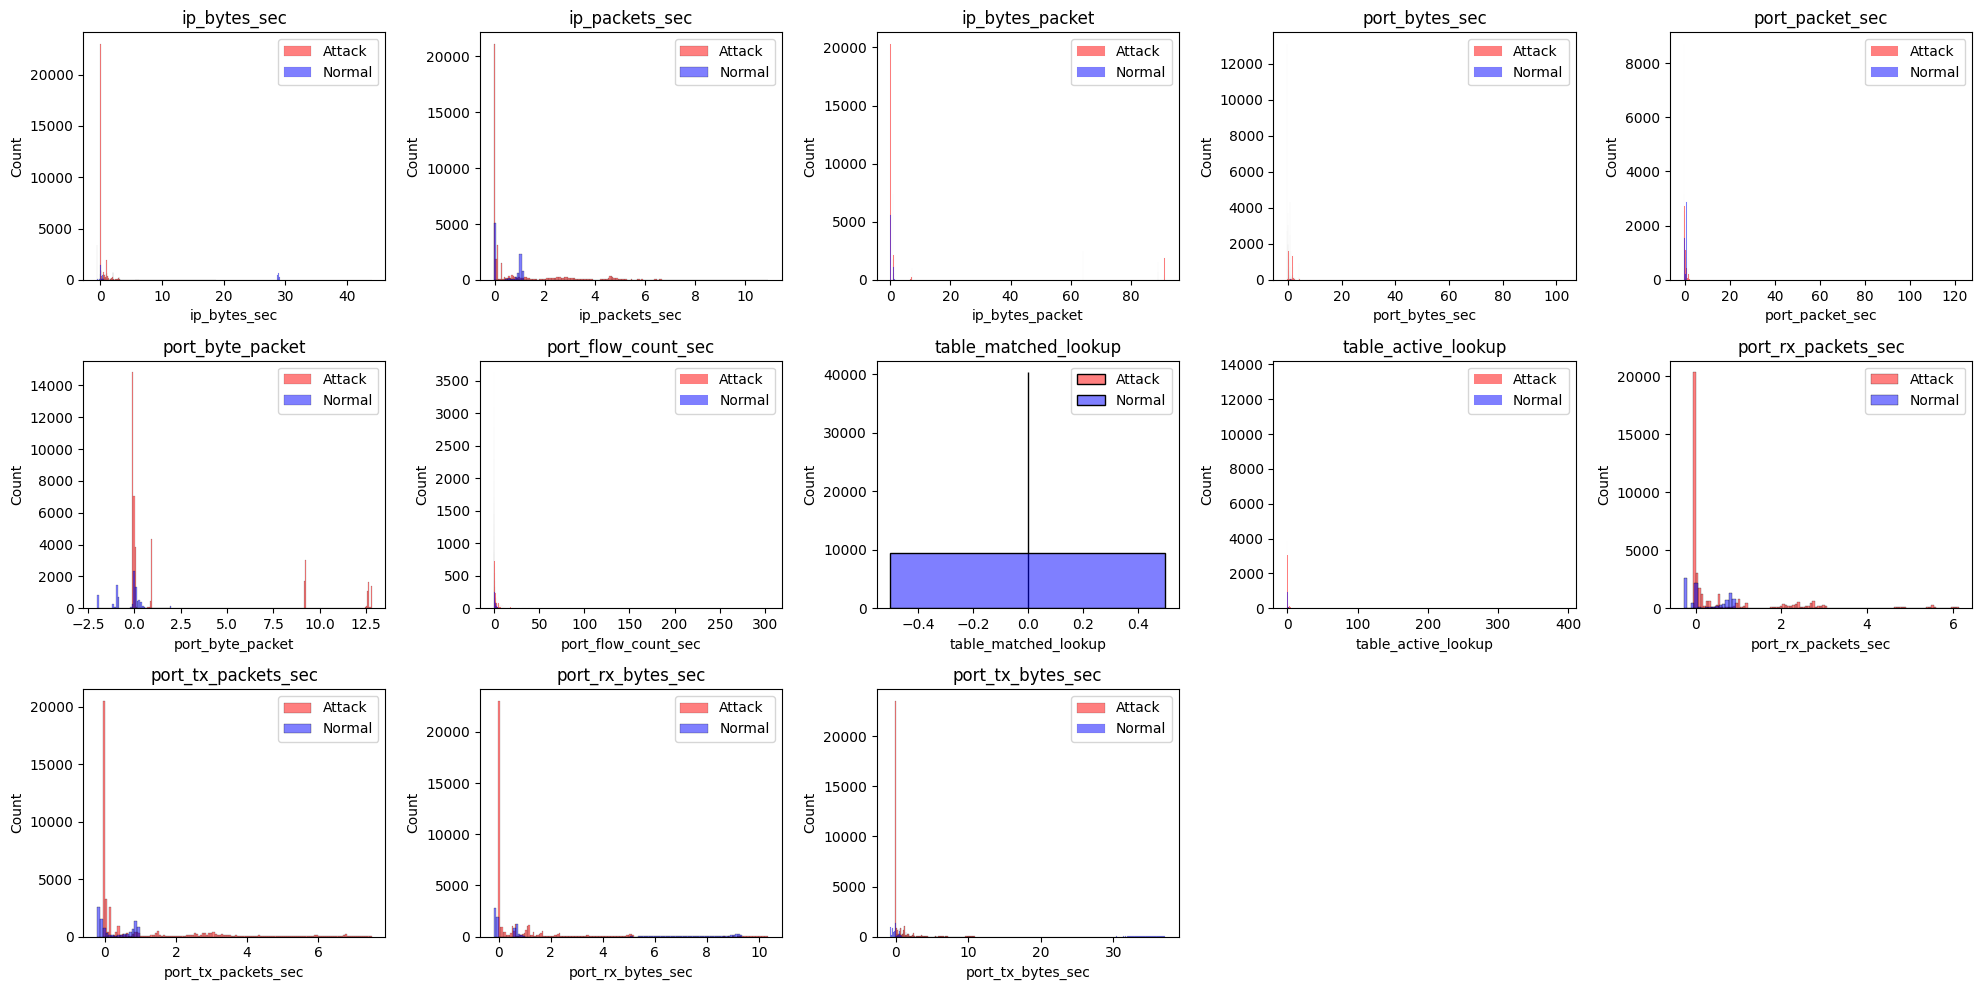

In [38]:
features_list = ['ip_bytes_sec', 'ip_packets_sec', 'ip_bytes_packet',
            'port_bytes_sec', 'port_packet_sec', 'port_byte_packet',
            'port_flow_count_sec', 'table_matched_lookup',
            'table_active_lookup', 'port_rx_packets_sec',
            'port_tx_packets_sec', 'port_rx_bytes_sec',
            'port_tx_bytes_sec']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(features_list, start=1):
    plt.subplot(3, 5, i)
    sns.histplot(attack_scaled[feature], color='red', alpha=0.5, label='Attack')
    sns.histplot(normal_scaled[feature], color='blue', alpha=0.5, label='Normal')
    plt.title(feature)
    plt.legend()

plt.tight_layout()
plt.show()